In [123]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [124]:
# Linear Regression

In [125]:
dataset = pd.read_csv("./dataset/AAPL.csv")

In [126]:
# View Columns
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [127]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,0.223042,0.004587,0,0,0,-0.052167
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,0.223321,0.004950,0,1,1,-0.073395
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,0.219482,0.004831,0,1,1,0.024743
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,0.219481,0.004695,0,1,1,0.028993
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,0.219480,0.004424,0,1,1,0.061030


In [128]:
# view dataset
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,0.223042,0.004587,0,0,0,-0.052167
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,0.223321,0.004950,0,1,1,-0.073395
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,0.219482,0.004831,0,1,1,0.024743
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,0.219481,0.004695,0,1,1,0.028993
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,0.219480,0.004424,0,1,1,0.061030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,0.007451,0.028606,0,1,1,-0.038285
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,0.002779,0.018330,1,1,1,0.006673
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,-0.008489,0.039195,1,0,0,0.020111
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,0.015294,0.025961,1,0,1,-0.039651


In [129]:
# view how many null values in each column
dataset.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Open_Close           0
High_Low             0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

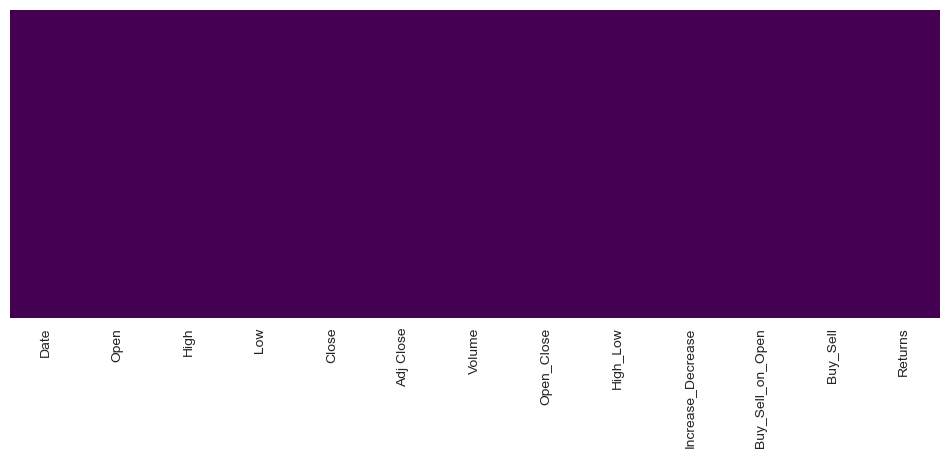

In [130]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

In [131]:
# view number of rows, number of columns
dataset.shape

(10467, 13)

In [132]:
# total number of records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  136071


In [133]:
# view columns names
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Open_Close', 'High_Low', 'Increase_Decrease', 'Buy_Sell_on_Open',
       'Buy_Sell', 'Returns'],
      dtype='object')

In [134]:
# view data types of the columns
dataset.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Open_Close           float64
High_Low             float64
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Returns              float64
dtype: object

In [135]:
# view dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10467 entries, 1 to 10467
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10467 non-null  object 
 1   Open               10467 non-null  float64
 2   High               10467 non-null  float64
 3   Low                10467 non-null  float64
 4   Close              10467 non-null  float64
 5   Adj Close          10467 non-null  float64
 6   Volume             10467 non-null  int64  
 7   Open_Close         10467 non-null  float64
 8   High_Low           10467 non-null  float64
 9   Increase_Decrease  10467 non-null  int32  
 10  Buy_Sell_on_Open   10467 non-null  int32  
 11  Buy_Sell           10467 non-null  int32  
 12  Returns            10467 non-null  float64
dtypes: float64(8), int32(3), int64(1), object(1)
memory usage: 1022.2+ KB


In [136]:
# view the statistics per each column
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,1.046700e+04,10467.000000,10467.000000,10467.000000,10467.00000,10467.000000,10467.000000
mean,14.759385,14.922904,14.595866,14.764931,14.131772,3.308357e+08,0.144609,0.032247,0.477023,0.49508,0.496513,0.001095
std,31.915378,32.290377,31.545149,31.930694,31.638489,3.388553e+08,0.062761,0.022787,0.499496,0.50000,0.500012,0.028350
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00,-0.065023,0.000000,0.000000,0.00000,0.000000,-0.518692
25%,0.283482,0.289465,0.276786,0.283482,0.235471,1.237712e+08,0.118683,0.017117,0.000000,0.00000,0.000000,-0.013101
50%,0.474107,0.483214,0.466518,0.475446,0.392373,2.181536e+08,0.149706,0.027212,0.000000,0.00000,0.000000,0.000000
75%,14.960535,15.057500,14.699821,14.903928,12.836109,4.105304e+08,0.189832,0.040972,1.000000,1.00000,1.000000,0.014708
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09,0.407891,0.359158,1.000000,1.00000,1.000000,0.332281


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Open_Close'}>,
        <AxesSubplot:title={'center':'High_Low'}>,
        <AxesSubplot:title={'center':'Increase_Decrease'}>],
       [<AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>,
        <AxesSubplot:title={'center':'Returns'}>]], dtype=object)

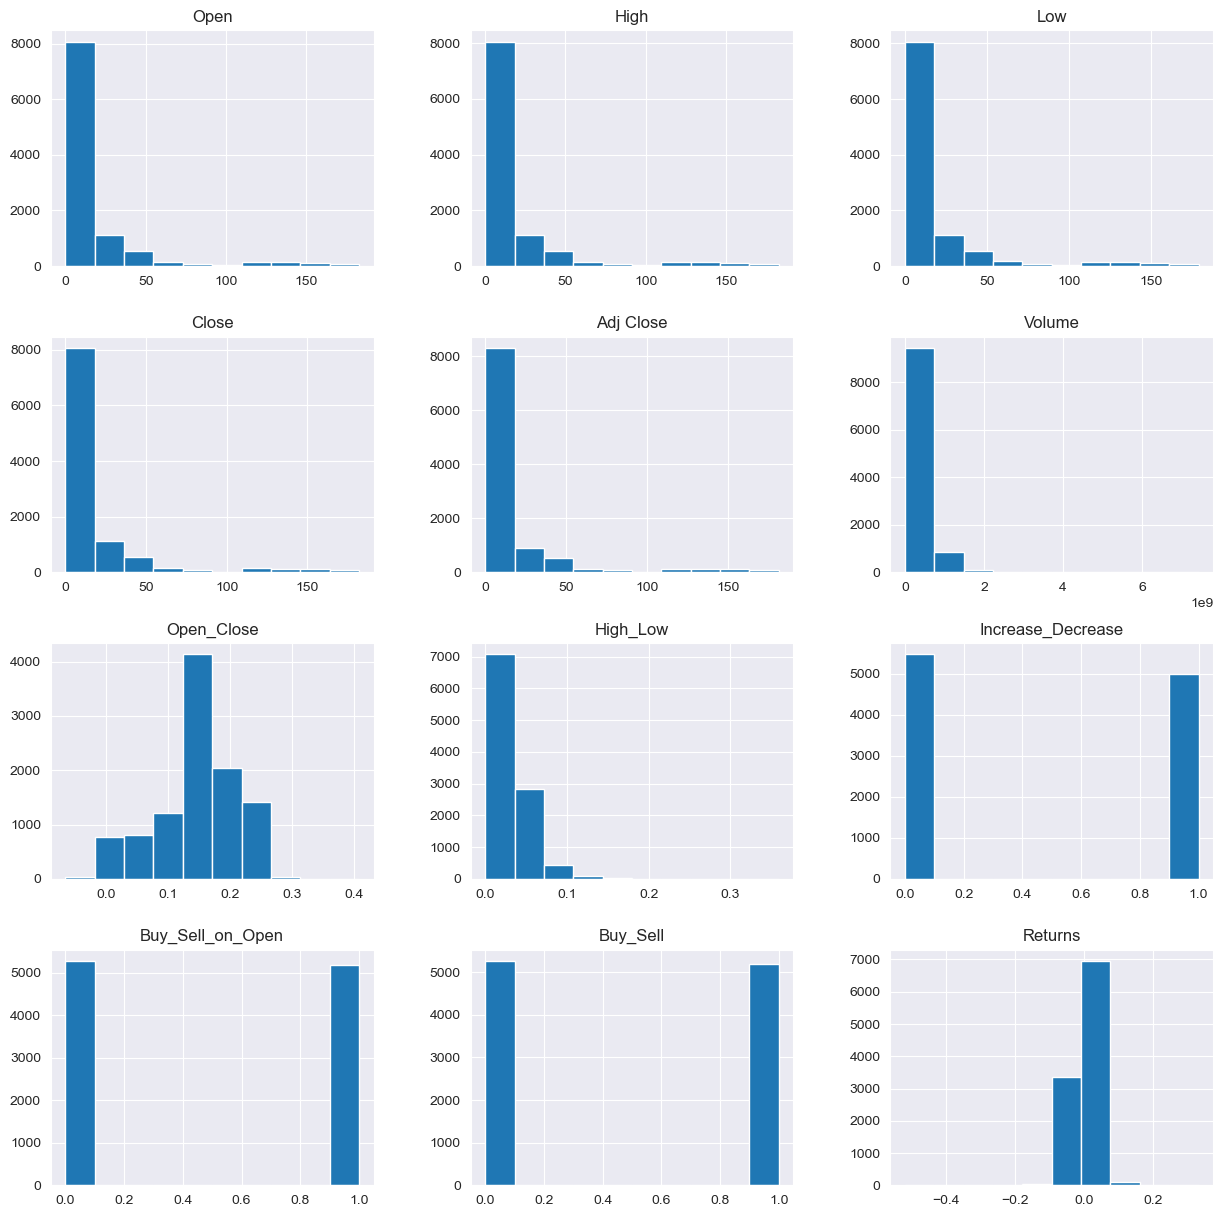

In [137]:
# view the histogram per each numerical column
dataset.hist(figsize=(15, 15))

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

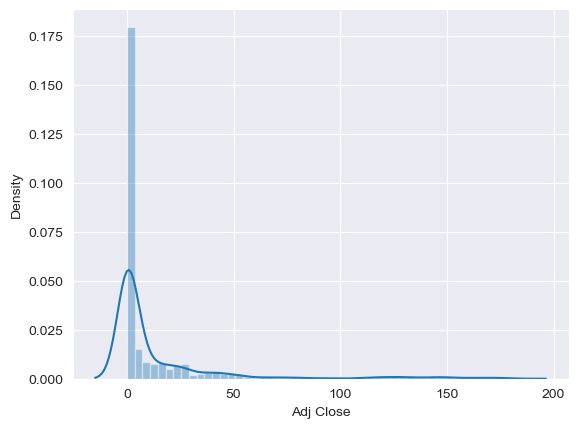

In [138]:
sns.distplot(dataset['Adj Close'])

<AxesSubplot:>

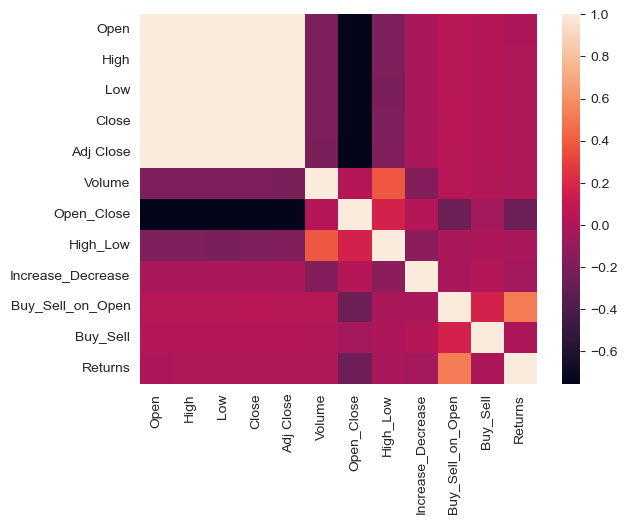

In [139]:
sns.heatmap(dataset.corr())

In [140]:
X = dataset[['Open', 'High', 'Low','Volume', 'Open_Close', 'High_Low', 'Returns']]
y = dataset['Adj Close']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [142]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [143]:
print(lm.intercept_)

-2.1989269952980717


In [144]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns={'Coefficient'})
coeff_df

,Coefficient
Open,-8.310333e-01
High,1.027401e+00
Low,8.053308e-01
Volume,-3.322886e-10
Open_Close,8.623111e+00
High_Low,1.163399e+01
Returns,5.680748e+00


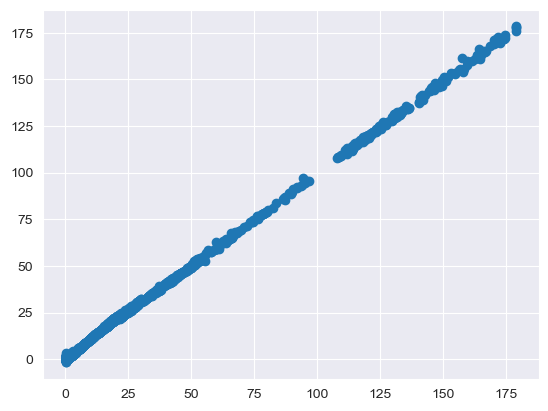

In [145]:
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.savefig("Figure: Comparison of Actual Values and Predictions Values")

In [146]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df.head())
print(df.tail())

         Actual  Predicted
9413  41.692989  42.048559
5432   0.261391  -1.460745
8649  28.197510  30.097229
8836  24.800287  25.725948
74     0.085370  -0.072596
           Actual   Predicted
10193  124.140747  123.870311
9804    59.581928   58.900794
8789    25.540367   26.494542
7801    11.744892   12.846353
9829    65.244087   64.477096


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

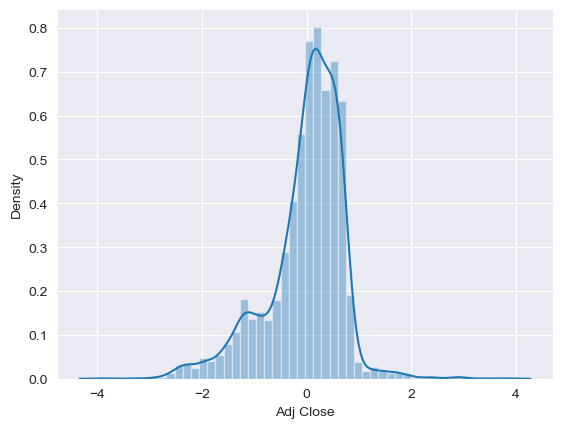

In [147]:
sns.distplot((y_test-y_pred),bins=50)

In [148]:
print(y_test.shape)
print(y_pred.shape)

(4187,)
(4187,)


In [149]:
lm_fit = lm.fit(X_train, y_train)
lm_scores = cross_val_score(lm_fit, X_train, y_train, cv = 5)

print("Mean cross validation score: {}".format(np.mean(lm_scores)))
print("Score without cv: {}".format(lm_fit.score(X_train, y_train)))

Mean cross validation score: 0.999496975628805
Score without cv: 0.9995047495732863


In [150]:
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.5313376069140198
Mean_Squared_Error(MSE): 0.5311132957883558
Root_Mean_Squared_Error(RMSE): 0.7287752025064764


In [151]:
print("Accuracy score: {:.7f}".format(lm.score(X_test, y_test)))

Accuracy score: 0.9994389
